## IMDB 영화평 감성분석(이전 분류)
- Kaggle - Bag of Words meets Bags of Popcon

### 1. 데이터 탐색

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/labeledTrainData.tsv', sep='\t')
df.head(3)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...


In [3]:
df = pd.read_csv('data/labeledTrainData.tsv', sep='\t', quoting=3)  # 3: Quote None
df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [5]:
print(df.review[0][:1000])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [6]:
df.isna().sum().sum()

0

In [7]:
# 중복여부 체크
df.review.nunique()

24904

In [8]:
# 중복 데이터 제거
df.drop_duplicates(subset=['review'], inplace=True)
df.shape

(24904, 3)

### 2. 텍스트 전처리

In [12]:
# <br /> 태그는 공백으로
df.review = df.review.str.replace('<br />', ' ')

In [13]:
# 구둣점, 숫자 제거 - 영문자 이외의 문자는 공백으로 변환
df.review = df.review.str.replace('[^A-Za-z]', ' ', regex=True)

# 

### 3. 데이터셋 분리

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.review.values, df.sentiment.values, stratify=df.sentiment.values,
    test_size=0.2, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19923,), (4981,), (19923,), (4981,))

### 4. 텍스트 인코딩

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english')

In [18]:
# train과 test dataset의 변환후 사이즈가 동일해야 함
cvect.fit(X_train)
X_train_cv = cvect.transform(X_train)
X_test_cv = cvect.transform(X_test)
X_train_cv.shape, X_test_cv.shape

#(19923, 66641) => (데이터수, 사이즈)

((19923, 66641), (4981, 66641))

### 5. 학습 및 평가

In [25]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2023, max_iter=500)

아래의 코드에서 오류남으로, 위의 코드에 max_iter=500 내용 추가함
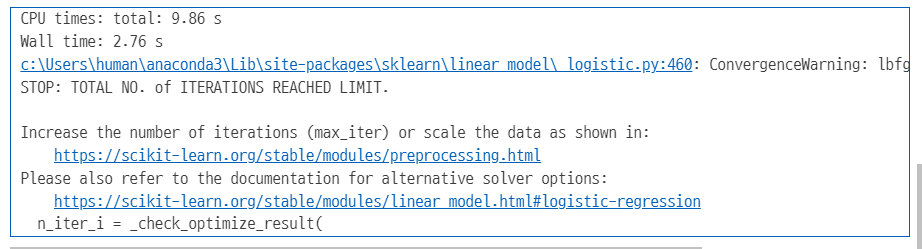

In [26]:
%time lrc.fit(X_train_cv, y_train)

CPU times: total: 20.9 s
Wall time: 5.67 s


LogisticRegression(max_iter=500, random_state=2023)

In [27]:
lrc.score(X_test_cv, y_test)

0.8813491266813893

### 6. Bigram

In [28]:
cvect2 = CountVectorizer(stop_words='english', ngram_range=(1,2))
cvect2.fit(X_train)
X_train_cv2 = cvect2.transform(X_train)
X_test_cv2 = cvect2.transform(X_test)
X_train_cv2.shape, X_test_cv2.shape

((19923, 1454639), (4981, 1454639))

In [32]:
lrc2 = LogisticRegression(random_state=2023, max_iter=500)
%time lrc2.fit(X_train_cv2, y_train)

CPU times: total: 3min 29s
Wall time: 59 s


LogisticRegression(max_iter=500, random_state=2023)